In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import accuracy_score
import xgboost as xgb
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [ ]:
NucliData_df = pd.read_csv('data.csv'); 

In [ ]:
NucliData_df.head()

,id,diagnostics,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
type(NucliData_df)

pandas.core.frame.DataFrame

In [ ]:
NucliData_df.shape

(569, 33)

In [ ]:
NucliData_df.size

18777

In [ ]:
NucliData_df.count()

id                         569
diagnostics                569
radius_mean                569
texture_mean               569
perimeter_mean             569
area_mean                  569
smoothness_mean            569
compactness_mean           569
concavity_mean             569
concave points_mean        569
symmetry_mean              569
fractal_dimension_mean     569
radius_se                  569
texture_se                 569
perimeter_se               569
area_se                    569
smoothness_se              569
compactness_se             569
concavity_se               569
concave points_se          569
symmetry_se                569
fractal_dimension_se       569
radius_worst               569
texture_worst              569
perimeter_worst            569
area_worst                 569
smoothness_worst           569
compactness_worst          569
concavity_worst            569
concave points_worst       569
symmetry_worst             569
fractal_dimension_worst    569
Unnamed:

In [ ]:
NucliData_df.isna().sum()

id                           0
diagnostics                  0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
NucliData_df = NucliData_df.dropna(axis=1)

In [ ]:
NucliData_df.shape

(569, 32)

In [ ]:
NucliData_df['diagnostics'].value_counts()

B    357
M    212
Name: diagnostics, dtype: int64

C:\Users\soura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnostics', ylabel='count'>

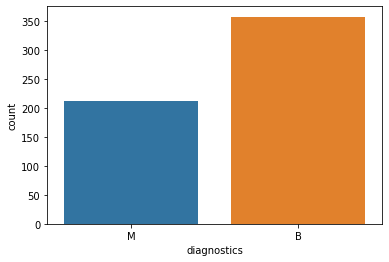

In [ ]:
sns.countplot(NucliData_df['diagnostics'], label='count')

In [ ]:
NucliData_df.shape

(569, 32)

In [ ]:
NucliData_df.dtypes

id                           int64
diagnostics                 object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
NucliData_df.head(10)

,id,diagnostics,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
NucliData_df.iloc[:,1] = labelencoder_y.fit_transform(NucliData_df.iloc[:,1].values)

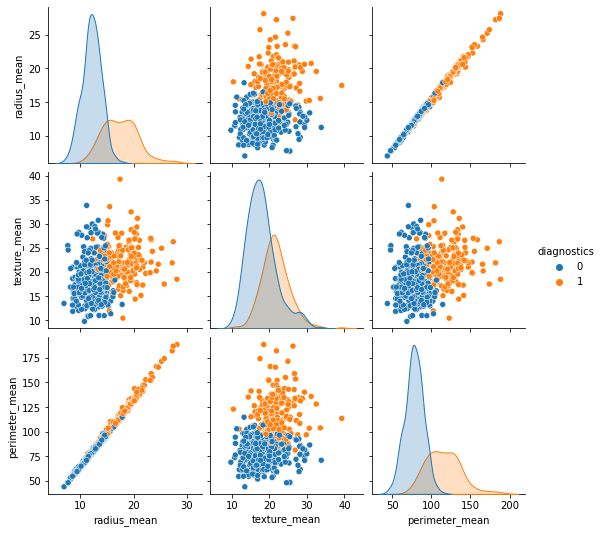

In [ ]:
sns.pairplot(NucliData_df.iloc[:,1:5], hue='diagnostics')

In [ ]:
NucliData_df.iloc[:,1:12].corr()

,diagnostics,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnostics,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


<AxesSubplot:>

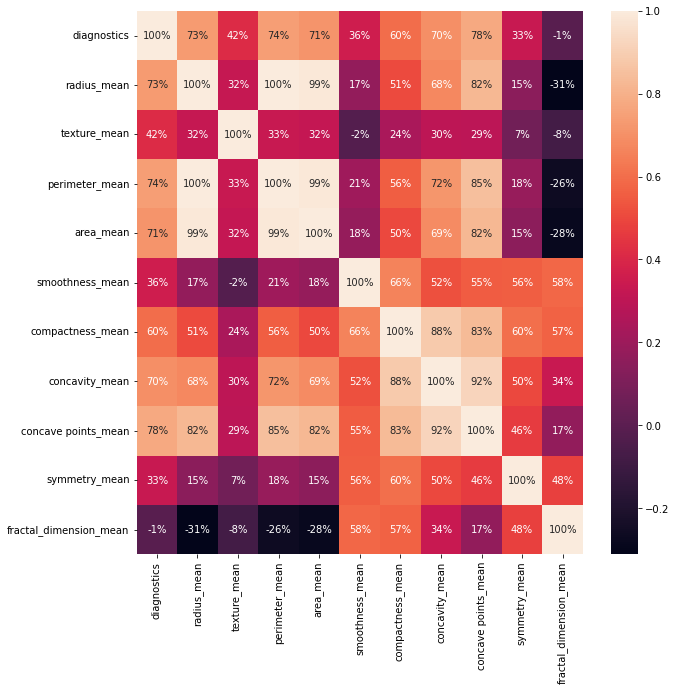

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(NucliData_df.iloc[:,1:12].corr(), annot=True, fmt='.0%')

In [ ]:
#spilt the data set into independent (X) andd dependent (Y) sata sets
X = NucliData_df.iloc[:,2:31].values
Y= NucliData_df.iloc[:,1].values

In [ ]:
#splil the data set into 75% training and 25% testing
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 0)

In [ ]:
#scale the data (feature scaling)
# imp..........
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
# function to find the detail of all the matrix

from sklearn.metrics import confusion_matrix

def Matrix(Y_predict):
    cm = confusion_matrix(Y_test, Y_predict)
    
    TP = cm[0][0]
    TN = cm[1][1]
    FP = cm[0][1]
    FN = cm[1][0]

    print(cm)
    print()

    Accuracy = (TP+TN)/(TP+TN+FP+FN)
    Precision = TP/(TP+FP)
    Recall = TP/(TP+FN)
    F1 = (2*Precision*Recall)/(Precision+Recall)

    print('Accuracy of the Classifier = ', Accuracy)
    print('Precision = ', Precision)
    print('F1 Score = ', F1)
    
    return Accuracy, Precision, Precision, F1

In [ ]:
# RANDOM FOREST CLASSIFIER

RANDOM FOREST CLASSIFIER


In [ ]:
# create a function for the models
# n_estimator = number of the trees
# max_depth = maximum depth of the tree
# min_samples_Split =  the minimum number of samples required to split an internal node:
# min_weight_fraction_leaf = 
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
 max_depth=None, max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.0,
 n_estimators=10, n_jobs=1, oob_score=False, random_state=None, verbose=0, warm_start=False)

Y_pred  = rf.predict(X_test)

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

0.9833333333333334 135


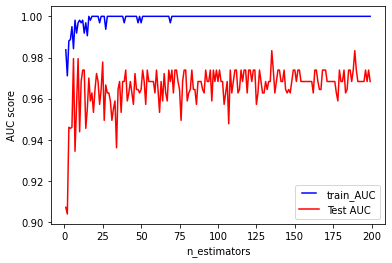

In [ ]:
n_estimators = np.arange(1,200,1)

train_results = []
test_results = []
for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator)
    rf.fit(X_train, Y_train)

    train_pred = rf.predict(X_train)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_pred)
    # print(false_positive_rate, true_positive_rate, thresholds, "train")
    # print()
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)


    Y_pred = rf.predict(X_test)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred)
    # print(false_positive_rate, true_positive_rate, thresholds, "test")
    # print()
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

max_y = max(test_results)
max_x = n_estimators[test_results.index(max_y)]
print(max_y, max_x)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_estimators, train_results, 'b', label="train_AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label = 'Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

0.9777777777777779 22


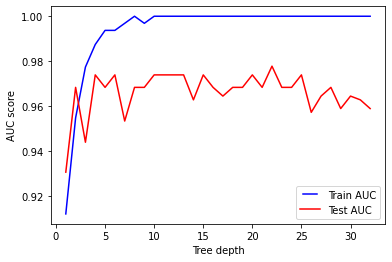

In [ ]:
max_depths = np.linspace(1,32,32, endpoint=True)

train_results = []
test_results = []

for max_depth in max_depths:
  rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
  rf.fit(X_train, Y_train)

  train_pred = rf.predict(X_train)

  false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  train_results.append(roc_auc)

  Y_pred = rf.predict(X_test)

  false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  test_results.append(roc_auc)

max_y = max(test_results)
max_x = n_estimators[test_results.index(max_y)]
print(max_y, max_x)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_depths, train_results, 'b', label = "Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label = "Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()
  

0.9777777777777779 1


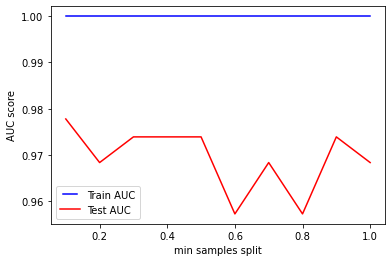

In [ ]:
min_samples_splits = np.linspace(0.1, 1.0,10, endpoint = True)

train_results = []
test_results = []

for min_samples_split in min_samples_splits:
  rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
  rf.fit(X_train, Y_train)

  train_pred = rf.predict(X_train)

  false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  train_results.append(roc_auc)

  Y_pred = rf.predict(X_test)

  false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  test_results.append(roc_auc)

max_y = max(test_results)
max_x = n_estimators[test_results.index(max_y)]
print(max_y, max_x)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(min_samples_splits, train_results, 'b', label = "Train AUC")
line2, = plt.plot(min_samples_splits, test_results, 'r', label = "Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

0.9627882599580713 1


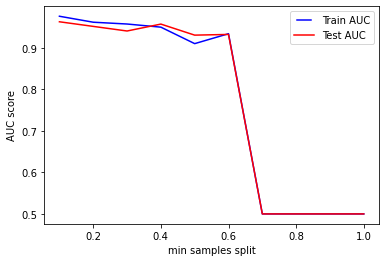

In [ ]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
   rf = RandomForestClassifier(min_samples_split=min_samples_split)
   rf.fit(X_train, Y_train)

   train_pred = rf.predict(X_train)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)

   Y_pred = rf.predict(X_test)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

max_y = max(test_results)
max_x = n_estimators[test_results.index(max_y)]
print(max_y, max_x)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

0.9627882599580713 1


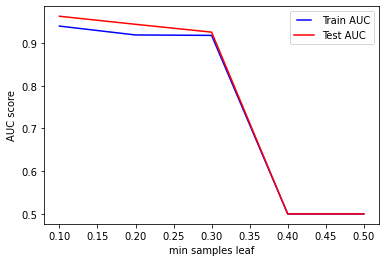

In [ ]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)

train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:

   rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
   rf.fit(X_train, Y_train)

   train_pred = rf.predict(X_train)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)

   Y_pred = rf.predict(X_test)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

max_y = max(test_results)
max_x = n_estimators[test_results.index(max_y)]
print(max_y, max_x)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

In [ ]:
n_estimators = [6, 8, 16, 21, 26, 30, 31, 39, 43, 49]

max_features = ['auto', 'sqrt']

max_depths = [6, 9, 11, 13]

min_samples_splits = [1, 2, 3, 4, 5]

min_samples_leafs = [1]

bootstrap = [True, False]

In [ ]:
param_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depths,
    'min_samples_split' : min_samples_splits,
    'min_samples_leaf' : min_samples_leafs,
    'bootstrap' : bootstrap
}

print(param_grid)

{'n_estimators': [6, 8, 16, 21, 26, 30, 31, 39, 43, 49], 'max_features': ['auto', 'sqrt'], 'max_depth': [6, 9, 11, 13], 'min_samples_split': [1, 2, 3, 4, 5], 'min_samples_leaf': [1], 'bootstrap': [True, False]}


In [ ]:
rf_Model = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv=3, verbose = 2, n_jobs=4)

In [ ]:
rf_RandomGrid.fit(X_train, Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\soura\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
3 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\soura\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\soura\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 442, in fit
    trees = Parallel(
  File "C:\Users\soura\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\soura\anaconda3\lib\site-packages\jobl

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [6, 9, 11, 13],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1],
                                        'min_samples_split': [1, 2, 3, 4, 5],
                                        'n_estimators': [6, 8, 16, 21, 26, 30,
                                                         31, 39, 43, 49]},
                   verbose=2)

In [ ]:
rf_RandomGrid.best_params_

{'n_estimators': 39,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 9,
 'bootstrap': True}

In [ ]:
print(f'Train Accuracy - : {rf_RandomGrid.score(X_train, Y_train):.3f}')
print(f'Test Accuracy - : {rf_RandomGrid.score(X_test, Y_test):.3f}')

# Y_PREDICTTION
y_predict_Random_Forest =  rf_RandomGrid.predict(X_test)
print(y_predict_Random_Forest)

Train Accuracy - : 1.000
Test Accuracy - : 0.972
[1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]


In [ ]:
# ADABOOST ENSEMBLE ALGORITHM (BAGGING)

In [ ]:
#classification through the Adaboost algorithm

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators = 100, random_state=0)
ada.fit(X_train, Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                   random_state=0)

In [ ]:
n_estimators = [6, 8, 16, 21, 26, 30, 31, 39, 43, 49]

max_features = ['auto', 'sqrt']

max_depths = [6, 9, 11, 13]

min_samples_splits = [1, 2, 3, 4, 5]

min_samples_leafs = [1]

bootstrap = [True, False]

In [ ]:
param_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depths,
    'min_samples_split' : min_samples_splits,
    'min_samples_leaf' : min_samples_leafs,
    'bootstrap' : bootstrap
}

In [ ]:
predictions = ada.score(X_test, Y_test)
print("Test Accuracy - :", predictions)

Test Accuracy - : 0.8881118881118881


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators = 100, random_state=0)
ada.fit(X_train, Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                   random_state=0)

In [ ]:
adaboost_Model = AdaBoostClassifier()

In [ ]:
param_grid = {
    'n_estimators' : [10, 50, 100, 200, 500],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1.0],
    'algorithm' : ['SAMME', 'SAMME.R']
}

In [ ]:
# random search for the Adaboost

from sklearn.model_selection import RandomizedSearchCV
AdaBoost_RandomGrid = RandomizedSearchCV(estimator = adaboost_Model, param_distributions = param_grid, cv=5, scoring = 'accuracy',  n_jobs=-1)

In [ ]:
AdaBoost_RandomGrid.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 1.0],
                                        'n_estimators': [10, 50, 100, 200,
                                                         500]},
                   scoring='accuracy')

In [ ]:
AdaBoost_RandomGrid.best_params_

{'n_estimators': 200, 'learning_rate': 1.0, 'algorithm': 'SAMME'}

In [ ]:
print(f'Train Accuracy - : {AdaBoost_RandomGrid.score(X_train, Y_train):.3f}')
print(f'Test Accuracy - : {AdaBoost_RandomGrid.score(X_test, Y_test):.3f}')

Train Accuracy - : 1.000
Test Accuracy - : 0.951


In [ ]:
# predict from the Adaboost RandomSea4rch algorithm
# Y_PREDICTION_ADABOOST
Y_predict_RandomGrid_Adaboost  = AdaBoost_RandomGrid.predict(X_test)

In [ ]:
#  Adaboost GridSearch algorithm 


from sklearn.model_selection import GridSearchCV

grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['algorithm'] = ['SAMME', 'SAMME.R']

grid_search = GridSearchCV(estimator = AdaBoostClassifier(), param_grid = grid, n_jobs = -1, cv=10, scoring = 'accuracy')
grid_result = grid_search.fit(X_train, Y_train)


print("Best: %f using train %s" % (grid_result.score(X_train, Y_train), grid_result.best_params_))
print("Best: %f using train %s" % (grid_result.score(X_test, Y_test), grid_result.best_params_))

Best: 1.000000 using train {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 500}
Best: 0.951049 using train {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 500}


In [ ]:
# predict from the Adaboost GridSearch algorithm
Y_predict_gridSearch_Adaboost  = grid_search.predict(X_test)

In [ ]:
Matrix(Y_predict_RandomGrid_Adaboost)
Matrix(Y_predict_gridSearch_Adaboost)

[[86  4]
 [ 3 50]]

Accuracy of the Classifier =  0.951048951048951
Precision =  0.9555555555555556
F1 Score =  0.9608938547486034
[[86  4]
 [ 3 50]]

Accuracy of the Classifier =  0.951048951048951
Precision =  0.9555555555555556
F1 Score =  0.9608938547486034


(0.951048951048951, 0.9555555555555556, 0.9555555555555556, 0.9608938547486034)

In [ ]:
# XGBoost

In [ ]:
space_XGBoost = {
    'max_depth' : hp.quniform("max_depth",1, 20, 1 ),
    'gamma' : hp.uniform ('gamma', 0, 9),
    'reg_alpha' : hp.quniform('reg_alpha', 1, 180, 1),
    'reg_lambda' : hp.uniform('reg_lambda', 0,1),
    'colsample_bytree' : hp.uniform('colsample_bytree', 0, 1),
    'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
    'n_estimators' : 200
}

In [ ]:
def objective_XGBoost(space):
    xgbclassify = xgb.XGBClassifier(n_estimators = space['n_estimators'], 
                            max_depth = int(space['max_depth']),
                            gamma = space['gamma'], 
                            reg_alpha = int(space['reg_alpha']), 
                            min_child_weight = int(space['min_child_weight']),
                            colsample_bytree = int(space['colsample_bytree']),
                            use_label_encoder=False    
                           )
    evaluation = [(X_train, Y_train), (X_test, Y_test)]
    xgbclassify.fit(X_train, Y_train, eval_set = evaluation, eval_metric='auc',
                   early_stopping_rounds=10, verbose = False)
    
    pred = xgbclassify.predict(X_test)
    accuracy = accuracy_score(Y_test, pred>0.3)
    print('SCORE:', accuracy)
    return {'loss' : -accuracy, 'status': STATUS_OK}


In [ ]:
trials = Trials()

best_hyperparams = fmin(fn = objective_XGBoost,
                       space = space_XGBoost,
                       algo = tpe.suggest,
                       max_evals = 400,
                       trials = trials)


SCORE:                                                                                                                 
0.9020979020979021                                                                                                     
SCORE:                                                                                                                 
0.9300699300699301                                                                                                     
SCORE:                                                                                                                 
0.6293706293706294                                                                                                     
SCORE:                                                                                                                 
0.951048951048951                                                                                                      
SCORE:                                  

SCORE:                                                                                                                 
0.9230769230769231                                                                                                     
SCORE:                                                                                                                 
0.9230769230769231                                                                                                     
SCORE:                                                                                                                 
0.6293706293706294                                                                                                     
SCORE:                                                                                                                 
0.916083916083916                                                                                                      
SCORE:                                  

SCORE:                                                                                                                 
0.9370629370629371                                                                                                     
SCORE:                                                                                                                 
0.9300699300699301                                                                                                     
SCORE:                                                                                                                 
0.951048951048951                                                                                                      
SCORE:                                                                                                                 
0.9230769230769231                                                                                                     
SCORE:                                  

SCORE:                                                                                                                 
0.6293706293706294                                                                                                     
SCORE:                                                                                                                 
0.9300699300699301                                                                                                     
SCORE:                                                                                                                 
0.9300699300699301                                                                                                     
SCORE:                                                                                                                 
0.9300699300699301                                                                                                     
SCORE:                                  

SCORE:                                                                                                                 
0.9370629370629371                                                                                                     
SCORE:                                                                                                                 
0.916083916083916                                                                                                      
SCORE:                                                                                                                 
0.9230769230769231                                                                                                     
SCORE:                                                                                                                 
0.951048951048951                                                                                                      
SCORE:                                  

SCORE:                                                                                                                 
0.9230769230769231                                                                                                     
SCORE:                                                                                                                 
0.9300699300699301                                                                                                     
SCORE:                                                                                                                 
0.6293706293706294                                                                                                     
SCORE:                                                                                                                 
0.951048951048951                                                                                                      
SCORE:                                  

SCORE:                                                                                                                 
0.951048951048951                                                                                                      
SCORE:                                                                                                                 
0.9300699300699301                                                                                                     
SCORE:                                                                                                                 
0.9300699300699301                                                                                                     
SCORE:                                                                                                                 
0.9230769230769231                                                                                                     
SCORE:                                  

SCORE:                                                                                                                 
0.9020979020979021                                                                                                     
SCORE:                                                                                                                 
0.6293706293706294                                                                                                     
SCORE:                                                                                                                 
0.9300699300699301                                                                                                     
SCORE:                                                                                                                 
0.6293706293706294                                                                                                     
SCORE:                                  

SCORE:                                                                                                                 
0.9370629370629371                                                                                                     
SCORE:                                                                                                                 
0.9300699300699301                                                                                                     
SCORE:                                                                                                                 
0.9370629370629371                                                                                                     
SCORE:                                                                                                                 
0.9300699300699301                                                                                                     
SCORE:                                  

SCORE:                                                                                                                 
0.9300699300699301                                                                                                     
SCORE:                                                                                                                 
0.9440559440559441                                                                                                     
SCORE:                                                                                                                 
0.9300699300699301                                                                                                     
SCORE:                                                                                                                 
0.9300699300699301                                                                                                     
SCORE:                                  

SCORE:                                                                                                                 
0.6293706293706294                                                                                                     
SCORE:                                                                                                                 
0.9020979020979021                                                                                                     
SCORE:                                                                                                                 
0.9300699300699301                                                                                                     
SCORE:                                                                                                                 
0.9230769230769231                                                                                                     
SCORE:                                  

SCORE:                                                                                                                 
0.6293706293706294                                                                                                     
SCORE:                                                                                                                 
0.6293706293706294                                                                                                     
SCORE:                                                                                                                 
0.9300699300699301                                                                                                     
SCORE:                                                                                                                 
0.9440559440559441                                                                                                     
SCORE:                                  

In [ ]:
print("The best hyperparameters:", "\n")
print(best_hyperparams)
print(best_hyperparams['colsample_bytree'])

The best hyperparameters: 

{'colsample_bytree': 0.25658587169336833, 'gamma': 8.781858695498114, 'max_depth': 3.0, 'min_child_weight': 4.0, 'reg_alpha': 1.0, 'reg_lambda': 0.916709791183198}
0.25658587169336833


In [ ]:
# final prediction from the XGBoost 

xgbclassify = xgb.XGBClassifier(n_estimators = 180, 
                            max_depth = int(best_hyperparams['max_depth']),
                            gamma = best_hyperparams['gamma'], 
                            reg_alpha = best_hyperparams['reg_alpha'], 
                            min_child_weight = best_hyperparams['min_child_weight'],
                            colsample_bytree = best_hyperparams['colsample_bytree'],
                            use_label_encoder=False    
                           )

In [ ]:
evaluation = [(X_train, Y_train), (X_test, Y_test)]
xgbclassify.fit(X_train, Y_train, eval_set = evaluation, eval_metric='auc',
                   early_stopping_rounds=10, verbose = False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.25658587169336833,
              enable_categorical=False, gamma=8.781858695498114, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=4.0, missing=nan, monotone_constraints='()',
              n_estimators=180, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=1.0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [ ]:
# Accuracy of the XGBoost
xgbclassify.score(X_test, Y_test)

0.958041958041958

In [ ]:
# Y_PREDICTION_XGBOOST

y_predict_XGBoost = xgbclassify.predict(X_test)

In [ ]:
Matrix(y_predict_XGBoost)

[[85  5]
 [ 1 52]]

Accuracy of the Classifier =  0.958041958041958
Precision =  0.9444444444444444
F1 Score =  0.9659090909090908


(0.958041958041958, 0.9444444444444444, 0.9444444444444444, 0.9659090909090908)

In [ ]:
#SVM

In [ ]:
#def svm_model(X_train, Y_train):
from sklearn.svm import SVC
svc_lin = SVC(kernel = 'linear', random_state = 0)
svc_lin.fit(X_train, Y_train)

#Using SVC rbf
from sklearn.svm import SVC
svc_rbf = SVC(kernel = 'rbf', random_state = 0)
svc_rbf.fit(X_train, Y_train)

print('Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
print('Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
  #return svc_rbf

Support Vector Machine (Linear Classifier) Training Accuracy: 0.9882629107981221
Support Vector Machine (RBF Classifier) Training Accuracy: 0.9835680751173709


In [ ]:
y_predict_SVM_linear =  svc_lin.predict(X_test)
y_predict_SVM_rbf = svc_rbf.predict(X_test)

In [ ]:
Matrix(y_predict_SVM_linear)
print()
Matrix(y_predict_SVM_rbf)

[[86  4]
 [ 2 51]]

Accuracy of the Classifier =  0.958041958041958
Precision =  0.9555555555555556
F1 Score =  0.9662921348314608

[[88  2]
 [ 3 50]]

Accuracy of the Classifier =  0.965034965034965
Precision =  0.9777777777777777
F1 Score =  0.9723756906077348


(0.965034965034965, 0.9777777777777777, 0.9777777777777777, 0.9723756906077348)

In [ ]:
#GridSearch_CV for SVM 
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'linear', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.628 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.635 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.624 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.624 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.624 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.988 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.906 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.918 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.953 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.965 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.977 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear

[CV 5/5] END ...C=1, gamma=0.01, kernel=sigmoid;, score=0.976 total time=   0.0s
[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.919 total time=   0.0s
[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.965 total time=   0.0s
[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.918 total time=   0.0s
[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.965 total time=   0.0s
[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.941 total time=   0.0s
[CV 1/5] END .....C=1, gamma=0.001, kernel=poly;, score=0.628 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.001, kernel=poly;, score=0.635 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.001, kernel=poly;, score=0.624 total time=   0.0s
[CV 4/5] END .....C=1, gamma=0.001, kernel=poly;, score=0.624 total time=   0.0s
[CV 5/5] END .....C=1, gamma=0.001, kernel=poly;, score=0.624 total time=   0.0s
[CV 1/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.988 total time=   0.0s
[CV 2/5] END ...C=1, gamma=0

[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.635 total time=   0.0s
[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.635 total time=   0.0s
[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.635 total time=   0.0s
[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.624 total time=   0.0s
[CV 1/5] END .......C=100, gamma=1, kernel=poly;, score=0.988 total time=   0.0s
[CV 2/5] END .......C=100, gamma=1, kernel=poly;, score=0.906 total time=   0.0s
[CV 3/5] END .......C=100, gamma=1, kernel=poly;, score=0.918 total time=   0.0s
[CV 4/5] END .......C=100, gamma=1, kernel=poly;, score=0.953 total time=   0.0s
[CV 5/5] END .......C=100, gamma=1, kernel=poly;, score=0.965 total time=   0.0s
[CV 1/5] END .....C=100, gamma=1, kernel=linear;, score=0.977 total time=   0.0s
[CV 2/5] END .....C=100, gamma=1, kernel=linear;, score=0.965 total time=   0.0s
[CV 3/5] END .....C=100, gamma=1, kernel=linear;, score=0.929 total time=   0.0s
[CV 4/5] END .....C=100, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'linear', 'sigmoid']},
             verbose=4)

In [ ]:
print(grid.best_estimator_)

SVC(C=100, gamma=0.001)


In [ ]:
#final model of the SVM through linear kernel 

from sklearn.svm import SVC
svc_lin_grid = SVC(kernel="linear", C=100, gamma=0.001, probability = True)
svc_lin_grid.fit(X_train, Y_train)
svc_poly_grid = SVC(kernel="poly", C=100, gamma=0.001, probability = True)
svc_poly_grid.fit(X_train, Y_train)
svc_sigmoid_grid = SVC(kernel="sigmoid", C=100, gamma=0.001, probability = True)
svc_sigmoid_grid.fit(X_train, Y_train)
svc_rbf_grid = SVC(kernel="rbf", C=100, gamma=0.001, probability= True)
svc_rbf_grid.fit(X_train, Y_train)

print('Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
print('Support Vector Machine (polynomial Classifier) Training Accuracy:', svc_poly_grid.score(X_train, Y_train))
print('Support Vector Machine (sigmoid Classifier) Training Accuracy:', svc_sigmoid_grid.score(X_train, Y_train))
print('Support Vector Machine (rbf Classifier) Training Accuracy:', svc_rbf_grid.score(X_train, Y_train))

Support Vector Machine (Linear Classifier) Training Accuracy: 0.9882629107981221
Support Vector Machine (polynomial Classifier) Training Accuracy: 0.6643192488262911
Support Vector Machine (sigmoid Classifier) Training Accuracy: 0.9882629107981221
Support Vector Machine (rbf Classifier) Training Accuracy: 0.9882629107981221


In [ ]:
grid_predict_linear_search = svc_lin_grid.predict(X_test)
grid_predict_poly_search = svc_poly_grid.predict(X_test)
grid_predict_sigmoid_search = svc_sigmoid_grid.predict(X_test)

# Y_PREDICTION_GRID_SEARCH
grid_predict_rbf_search = svc_rbf_grid.predict(X_test)

In [ ]:
Matrix(grid_predict_linear_search)
Matrix(grid_predict_poly_search)
Matrix(grid_predict_sigmoid_search)
Matrix(grid_predict_rbf_search)

[[85  5]
 [ 4 49]]

Accuracy of the Classifier =  0.9370629370629371
Precision =  0.9444444444444444
F1 Score =  0.9497206703910613
[[90  0]
 [48  5]]

Accuracy of the Classifier =  0.6643356643356644
Precision =  1.0
F1 Score =  0.7894736842105263
[[86  4]
 [ 3 50]]

Accuracy of the Classifier =  0.951048951048951
Precision =  0.9555555555555556
F1 Score =  0.9608938547486034
[[87  3]
 [ 1 52]]

Accuracy of the Classifier =  0.972027972027972
Precision =  0.9666666666666667
F1 Score =  0.9775280898876404


(0.972027972027972, 0.9666666666666667, 0.9666666666666667, 0.9775280898876404)

In [ ]:
# sourabh asharma content

space = {
    'C' : hp.uniform("C", 0.001, 100),
    'gamma': hp.uniform("gamma", 0.001, 1),
    'kernel':hp.choice('kernel', ['poly','rbf','linear', 'sigmoid'])
    }

kernels = ['poly','rbf','linear','sigmoid']

In [ ]:
from sklearn.metrics import accuracy_score

def objective(space):
    
    SVC_classifier = SVC(
            C = space['C'],
            gamma = space['gamma'],
            kernel = space['kernel']
        )
    
    SVC_classifier.fit(X_train, Y_train)
    
    y_pred = SVC_classifier.predict(X_test)
    
    accuracy = accuracy_score(Y_test, y_pred)
    
    print(accuracy)
    
#     pred = SVC_classifier.predict(X_test)
    print('SCORE:', accuracy)
    return {'loss' : -accuracy, 'status': STATUS_OK}


In [ ]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                       space = space,
                       algo = tpe.suggest,
                       max_evals = 400,
                       trials = trials)


0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.951048951048951                                                                                                      
SCORE:                                                                                                                 
0.951048951048951                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                       

0.958041958041958                                                                                                      
0.6993006993006993                                                                                                     
SCORE:                                                                                                                 
0.6993006993006993                                                                                                     
0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                  

SCORE:                                                                                                                 
0.8741258741258742                                                                                                     
0.9090909090909091                                                                                                     
SCORE:                                                                                                                 
0.9090909090909091                                                                                                     
0.9440559440559441                                                                                                     
SCORE:                                                                                                                 
0.9440559440559441                                                                                                     
0.7902097902097902                      

0.7132867132867133                                                                                                     
SCORE:                                                                                                                 
0.7132867132867133                                                                                                     
0.972027972027972                                                                                                      
SCORE:                                                                                                                 
0.972027972027972                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                       

0.958041958041958                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                  

SCORE:                                                                                                                 
0.9020979020979021                                                                                                     
0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.9370629370629371                      

0.9020979020979021                                                                                                     
SCORE:                                                                                                                 
0.9020979020979021                                                                                                     
0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                       

0.951048951048951                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.965034965034965                                                                                                      
SCORE:                                                                                                                 
0.965034965034965                                                                                                      
0.8881118881118881                                                                                                     
SCORE:                                  

SCORE:                                                                                                                 
0.951048951048951                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.9090909090909091                      

0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.972027972027972                                                                                                      
SCORE:                                                                                                                 
0.972027972027972                                                                                                      
0.972027972027972                                                                                                      
SCORE:                                                                                                                 
0.972027972027972                       

0.958041958041958                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.951048951048951                                                                                                      
SCORE:                                                                                                                 
0.951048951048951                                                                                                      
0.7482517482517482                                                                                                     
SCORE:                                  

SCORE:                                                                                                                 
0.9020979020979021                                                                                                     
0.8181818181818182                                                                                                     
SCORE:                                                                                                                 
0.8181818181818182                                                                                                     
0.965034965034965                                                                                                      
SCORE:                                                                                                                 
0.965034965034965                                                                                                      
0.9440559440559441                      

0.972027972027972                                                                                                      
SCORE:                                                                                                                 
0.972027972027972                                                                                                      
0.6853146853146853                                                                                                     
SCORE:                                                                                                                 
0.6853146853146853                                                                                                     
0.9020979020979021                                                                                                     
SCORE:                                                                                                                 
0.9020979020979021                      

0.9790209790209791                                                                                                     
0.951048951048951                                                                                                      
SCORE:                                                                                                                 
0.951048951048951                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.9370629370629371                                                                                                     
SCORE:                                  

SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.9020979020979021                                                                                                     
SCORE:                                                                                                                 
0.9020979020979021                                                                                                     
0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.6923076923076923                      

0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.9440559440559441                                                                                                     
SCORE:                                                                                                                 
0.9440559440559441                      

0.958041958041958                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.8951048951048951                                                                                                     
SCORE:                                  

SCORE:                                                                                                                 
0.965034965034965                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.9440559440559441                                                                                                     
SCORE:                                                                                                                 
0.9440559440559441                                                                                                     
0.958041958041958                       

In [ ]:
print("The best hyperparameters:", "\n")
print(best_hyperparams)
print("kernel : ", kernels[best_hyperparams['kernel']])

The best hyperparameters: 

{'C': 85.0585263788046, 'gamma': 0.04305455752945301, 'kernel': 0}
kernel :  poly


In [ ]:
SVC_classify = SVC(
            C = best_hyperparams['C'],
            gamma = best_hyperparams['gamma'],
            kernel = 'rbf',
                )

SVC_classify.fit(X_train, Y_train)
                           
SVC_classify.score(X_train, Y_train)

1.0

In [ ]:
# Y_PREDICTION_SVM
y_predict_SVC = SVC_classify.predict(X_test)

In [ ]:
Matrix(y_predict_SVC)

[[85  5]
 [ 2 51]]

Accuracy of the Classifier =  0.951048951048951
Precision =  0.9444444444444444
F1 Score =  0.96045197740113


(0.951048951048951, 0.9444444444444444, 0.9444444444444444, 0.96045197740113)

In [ ]:
# ROC, AUC Curve

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

r_probs = [0 for _ in range(len(Y_test))]
Random_Forest_Probs = rf_RandomGrid.predict_proba(X_test)
AdaBoost_Probs = AdaBoost_RandomGrid.predict_proba(X_test)
XGBoost_Probs = xgbclassify.predict_proba(X_test)
SVM_Probs = svc_rbf_grid.predict_proba(X_test)


Random_Forest_Probsf = Random_Forest_Probs[:, 1]
AdaBoost_Probsf = AdaBoost_Probs[: ,1]
XGBoost_Probsf = XGBoost_Probs[: ,1]
SVM_Probsf = SVM_Probs[: ,1]

r_auc = roc_auc_score(Y_test, r_probs)
Random_Forest_Auc = roc_auc_score(Y_test,Random_Forest_Probsf)
AdaBoost_Auc = roc_auc_score(Y_test, AdaBoost_Probsf)
XGBoost_Auc = roc_auc_score(Y_test, XGBoost_Probsf)
SVM_Auc = roc_auc_score(Y_test, SVM_Probsf)

print('Random (chance) Prediction: AUROC = %.3f' % (Random_Forest_Auc))
print('Random Forest  Prediction: AUROC = %.3f' % (Random_Forest_Auc))
print('AdaBoost  Prediction: AUROC = %.3f' % (AdaBoost_Auc))
print('XGBoost  Prediction: AUROC = %.3f' % (XGBoost_Auc))
print('SVM  Prediction: AUROC = %.3f' % (SVM_Auc))

Random (chance) Prediction: AUROC = 0.996
Random Forest  Prediction: AUROC = 0.996
AdaBoost  Prediction: AUROC = 0.994
XGBoost  Prediction: AUROC = 0.994
SVM  Prediction: AUROC = 0.998


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

r_fpr, r_tpr, _ = roc_curve(Y_test, r_probs)
Random_Forest_fpr, Random_Forest_tpr, _ = roc_curve(Y_test, Random_Forest_Probsf)
AdaBoost_fpr, AdaBoost_tpr, _ = roc_curve(Y_test, AdaBoost_Probsf) 
XGBoost_fpr, XGBoost_tpr, _ = roc_curve(Y_test, XGBoost_Probsf)
SVM_fpr, SVM_tpr, _ = roc_curve(Y_test, SVM_Probsf)

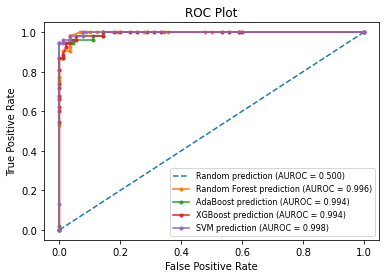

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.axis import Axis

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(Random_Forest_fpr, Random_Forest_tpr, marker='.', label='Random Forest prediction (AUROC = %0.3f)' % Random_Forest_Auc)
plt.plot(AdaBoost_fpr, AdaBoost_tpr, marker='.', label='AdaBoost prediction (AUROC = %0.3f)' % AdaBoost_Auc)
plt.plot(XGBoost_fpr, XGBoost_tpr, marker='.', label='XGBoost prediction (AUROC = %0.3f)' % XGBoost_Auc)
plt.plot(SVM_fpr, SVM_tpr, marker='.', label='SVM prediction (AUROC = %0.3f)' % SVM_Auc)

# Title
plt.title('ROC Plot')

# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show legend
plt.legend(prop={'size': 8}) 
# Show plot
plt.show()


In [ ]:
#Graphs of Accuracy, precision, recall

In [ ]:
ML_classifiers = ['Random Forest',"AdaBoostRSCV","AdaBoost_GSCV","XGBoost","SVM"]
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,round(y[i],4),round(y[i],4))         
def plotting(accuracy,precision,recall,fscore):
  
  sns.set_style('white')
  colors = sns.color_palette('Set2')

  #plt.figure(figsize=(2, 2))
  max_y_lim = 100
  min_y_lim = 90
  plt.ylim(min_y_lim, max_y_lim)
  
  plt.bar(ML_classifiers, accuracy, color = colors[:5],
        width = 0.4)

  addlabels(ML_classifiers, accuracy)
    
  plt.title('Accuracy', size=20,fontweight="bold")
  plt.ylabel('Accuracy')
  plt.xticks(rotation = 25)
  plt.xlabel('Algorithms')
  plt.show()

  max_y_lim = 1
  min_y_lim = 0.8
  plt.ylim(min_y_lim, max_y_lim)
  plt.bar(ML_classifiers, precision, color = colors[:5],
        width = 0.4)
  addlabels(ML_classifiers, precision)
  plt.title('Precision',size=20,fontweight="bold")
  plt.ylabel('Precision')
  plt.xticks(rotation = 25)
  plt.xlabel('Algorithms', fontweight="bold")
  plt.show()

  max_y_lim = 1
  min_y_lim = 0.8
  plt.ylim(min_y_lim, max_y_lim)
  plt.bar(ML_classifiers, recall, color = colors[:5],
        width = 0.4)

  addlabels(ML_classifiers, recall)
  plt.title('Recall', size=20,fontweight="bold")
  plt.ylabel('Accuracy')
  plt.xticks(rotation = 25)
  plt.xlabel('Algorithms')
  plt.show()

  max_y_lim = 1
  min_y_lim = 0.8
  plt.ylim(min_y_lim, max_y_lim)
  plt.bar(ML_classifiers, fscore, color = colors[:5],
        width = 0.4)
  addlabels(ML_classifiers, fscore)
  plt.title('F1 Score',size=20,fontweight="bold")
  plt.ylabel('F1 Score')
  plt.xticks(rotation = 25)
  plt.xlabel('Algorithms')
  plt.show()

  #add axis labels to plot
  

  #display plot
  plt.show()

In [ ]:
mat = [Matrix(y_predict_Random_Forest),
       Matrix(Y_predict_RandomGrid_Adaboost),
       Matrix(Y_predict_gridSearch_Adaboost),
       Matrix(y_predict_XGBoost),
       Matrix(y_predict_SVC)
       ]

accuracy_list = []
precision_list = []
recall_list = []
fscore_list = []

def res(mat):
  accuracy_list.append(mat[0]*100)
  precision_list.append(mat[1])
  recall_list.append(mat[2])
  fscore_list.append(mat[3])


for i in range(5):
  res(mat[i])
print(recall_list)
print(precision_list)

[[87  3]
 [ 1 52]]

Accuracy of the Classifier =  0.972027972027972
Precision =  0.9666666666666667
F1 Score =  0.9775280898876404
[[86  4]
 [ 3 50]]

Accuracy of the Classifier =  0.951048951048951
Precision =  0.9555555555555556
F1 Score =  0.9608938547486034
[[86  4]
 [ 3 50]]

Accuracy of the Classifier =  0.951048951048951
Precision =  0.9555555555555556
F1 Score =  0.9608938547486034
[[85  5]
 [ 1 52]]

Accuracy of the Classifier =  0.958041958041958
Precision =  0.9444444444444444
F1 Score =  0.9659090909090908
[[85  5]
 [ 2 51]]

Accuracy of the Classifier =  0.951048951048951
Precision =  0.9444444444444444
F1 Score =  0.96045197740113
[0.9666666666666667, 0.9555555555555556, 0.9555555555555556, 0.9444444444444444, 0.9444444444444444]
[0.9666666666666667, 0.9555555555555556, 0.9555555555555556, 0.9444444444444444, 0.9444444444444444]


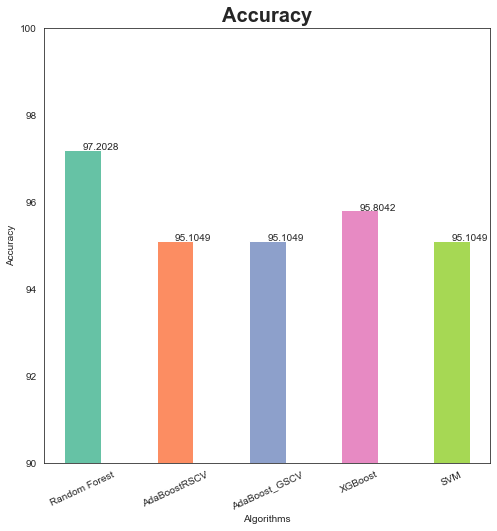

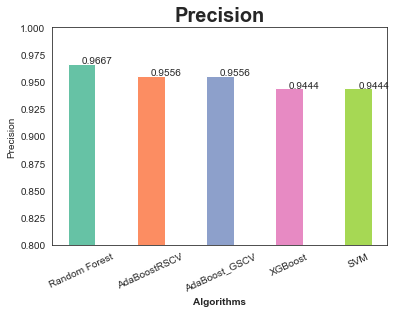

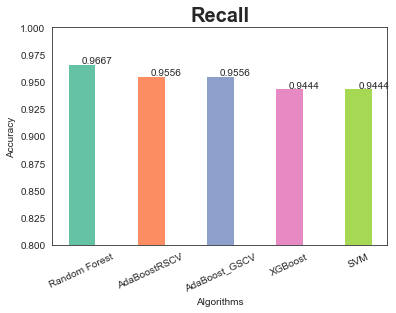

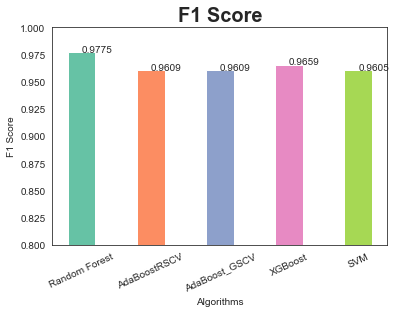

In [ ]:
plotting(accuracy_list,precision_list,recall_list,fscore_list)